In [ ]:
#from google.colab import drive
#uploaded = files.upload(https://drive.google.com/drive/folders/14dya4XZf6K5g4hMaaUl_riu3_pX0H0zK?usp=sharing)
#drive.mount('/gdrive')

#model


In [ ]:
#!unzip '/content/drive/MyDrive/lane_class_dataset.zip'

In [ ]:
#!wget 'https://drive.google.com/drive/folders/14dya4XZf6K5g4hMaaUl_riu3_pX0H0zK/download'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Sky_dir = '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images'

In [ ]:
import os
import shutil
import cv2

In [ ]:
listdir = os.listdir(Sky_dir)
for i in listdir:
  foldername=os.path.join(Sky_dir, i)
  folder = os.listdir(foldername)
  for j in folder:
   image=cv2.imread(os.path.join(foldername, j))
   print(image.shape)
   break
  print('{}   {}'.format(i, len(folder)))

(768, 1024, 3)
Overcast   112
(768, 1024, 3)
Partially_Cloudy   140
(768, 1024, 3)
Clear_Sky   197


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
import collections
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import random

In [ ]:
import imageio
import glob
from skimage import io

In [ ]:
from sklearn import preprocessing
from array import array

In [ ]:
names = []
folder_list = os.listdir(Sky_dir)
for i in range(len(folder_list)):
  names.append(folder_list[i])
Dict = {}
label_encoder = preprocessing.LabelEncoder()
label = label_encoder.fit_transform(names)
for i in range(len(names)):
  Dict[names[i]]=label[i]

In [ ]:
print(Dict)

{'Overcast': 1, 'Partially_Cloudy': 2, 'Clear_Sky': 0}


In [ ]:
def class_name(val):
  for key, value in Dict.items():
    if val==value:
      return key
  return 'doesn\'t exist'

In [ ]:
class SkyTypeDataset(Dataset):
  def __init__(self, root_dir, label_encoder, transform=None, split='train'):
    self.root_dir = root_dir
    self.transform = transform
    self.Dict=label_encoder

    self.folder_list = os.listdir(root_dir)
    self.dataset = []

    for i in range(len(self.folder_list)):
      # self.names.add(self.folder_list[i])
      self.img_folder = os.listdir(os.path.join(self.root_dir, self.folder_list[i]))

      random.seed(i+1)
      random.shuffle(self.img_folder)

      if split=='train':
        self.img_folder = self.img_folder[:int(len(self.img_folder)*0.8)]
        for img_path in self.img_folder:
          self.dataset.append([self.folder_list[i], os.path.join(root_dir,self.folder_list[i],img_path)])
      if split=='val':
        self.img_folder = self.img_folder[int(len(self.img_folder)*0.8):]
        for img_path in self.img_folder:
          self.dataset.append([self.folder_list[i], os.path.join(root_dir,self.folder_list[i],img_path)])
    random.shuffle(self.dataset)
    print(self.dataset)
  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    # Dict = {}
    # label_encoder = preprocessing.LabelEncoder()
    # label = label_encoder.fit_transform(list(self.names))
    # for i in range(len(list(self.names))):
    #   Dict[list(self.names)[i]]=label[i]
    # print(Dict)
    label, image_path = self.dataset[idx][0], self.dataset[idx][1]
    name = self.Dict[label]
    image = io.imread(image_path)
    # print(image)
    image = image.transpose((2, 0, 1))

    # print(image.shape)
    image = torch.from_numpy(image)
    if self.transform:
      image = self.transform(image)
    # print(image)
    return image, name

In [ ]:
train_transforms = transforms.Compose([transforms.ToPILImage(),
                                       transforms.Resize((400, 400)),
                                       transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1,hue=0.1),
                                       transforms.RandomRotation(5),
                                        # transforms.RandomResizedCrop((400, 50)),
                                       transforms.ToTensor(),
                                      # transforms.Normalize([0.3926, 0.3333, 0.1706],[0.1944, 0.1637, 0.1372]),
                                       ])
test_transforms = transforms.Compose([transforms.ToPILImage(),
                                      transforms.Resize((400, 400)),
                                      transforms.ToTensor(),
                                      ])


In [ ]:
train_data = SkyTypeDataset(root_dir=Sky_dir, label_encoder=Dict, transform=train_transforms, split='train')

[['Partially_Cloudy', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Partially_Cloudy/439.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/122.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/178.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/519.jpg'], ['Partially_Cloudy', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Partially_Cloudy/404.jpg'], ['Partially_Cloudy', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Partially_Cloudy/399.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/527.jpg'], ['Overcast', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Overcast/231.jpg'], ['Partially_Cloudy', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Partially_Cloudy/10

In [ ]:
len(train_data)

358

In [ ]:
train_data[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 2)

In [ ]:
test_data = SkyTypeDataset(root_dir=Sky_dir, label_encoder=Dict, transform=test_transforms, split='val')

[['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/129.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/362.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/486.jpg'], ['Overcast', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Overcast/20.jpg'], ['Overcast', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Overcast/286.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/363.jpg'], ['Clear_Sky', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Clear_Sky/379.jpg'], ['Partially_Cloudy', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Partially_Cloudy/386.jpg'], ['Overcast', '/content/drive/MyDrive/Sky Images at Location 1/10_09_2019/sky_images/Overcast/242.jpg'], ['Clear_Sky', '/content/drive/MyDrive/

In [ ]:
len(test_data)

91

In [ ]:
train_classes = [labels for _, labels in train_data]
Counter(train_classes)


Counter({0: 157, 1: 89, 2: 112})

In [ ]:
test_classes = [labels for _, labels in test_data]
Counter(test_classes)

Counter({0: 40, 1: 23, 2: 28})

In [ ]:
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size)

val_loader = torch.utils.data.DataLoader(test_data,
                                         batch_size=batch_size)

In [ ]:
for batch_idx, (target, data) in enumerate(val_loader):
  # if batch_idx!=34:
  print(batch_idx,data.shape, target.shape, len(target))

0 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
1 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
2 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
3 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
4 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
5 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
6 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
7 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
8 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
9 torch.Size([1]) torch.Size([1, 3, 400, 400]) 1


In [ ]:
for batch_idx, (target, data) in enumerate(train_loader):
  # if batch_idx!=34:
  print(batch_idx,data.shape, target.shape, len(target))

0 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
1 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
2 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
3 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
4 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
5 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
6 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
7 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
8 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
9 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
10 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
11 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
12 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
13 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
14 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
15 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
16 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
17 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
18 torch.Size([10]) torch.Size([10, 3, 400, 400]) 10
19 

In [ ]:
inputs, classes = next(iter(train_loader))

In [ ]:
print(classes)

tensor([2, 0, 0, 0, 2, 2, 0, 1, 2, 2])


torch.Size([10, 3, 400, 400])
torch.Size([3, 806, 3218])


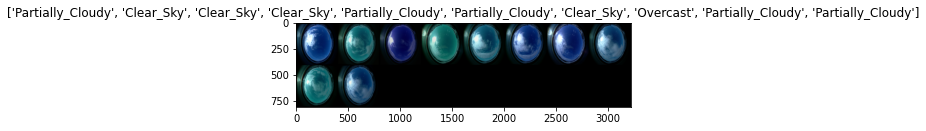

In [ ]:
import torchvision
import numpy as np


def imshow(inp, title=None):
    """Imshow for Tensor."""
    print(inp.shape)
    inp = inp.numpy().transpose((1, 2, 0))
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(train_loader))
print(inputs.shape)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_name(x) for x in classes])

torch.Size([10, 3, 400, 400])
torch.Size([3, 806, 3218])


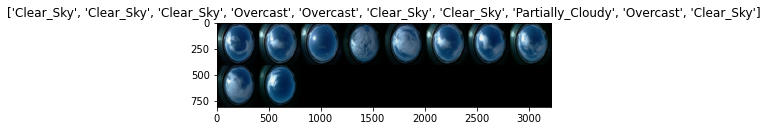

In [ ]:
inputs, classes = next(iter(val_loader))
print(inputs.shape)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_name(x) for x in classes])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
# print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
out_feature = len(Dict)
print(out_feature)

3


In [ ]:
model.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(256, out_feature))

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [ ]:
criterion = nn.CrossEntropyLoss(weight = None)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
epochs = 30
steps = 0
running_loss = 0
print_every = 20
train_losses, test_losses = [], []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        # logps = model(inputs)
        # loss = criterion(logps, labels)

        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            test_loss = 0
            testaccuracy = 0
            trainaccuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    # logps = model(inputs)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()

                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    testaccuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    # testaccuracy += (logps.argmax(1) == labels).type(torch.float).sum().item()
                # size = len(val_loader.dataset)
                # testaccuracy/=size
                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device),labels.to(device)
                    logps = model.forward(inputs)
                    # logps = model(inputs)
                    batch_loss = criterion(logps, labels)
                    #test_loss += batch_loss.item()

                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    trainaccuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    # trainaccuracy += (logps.argmax(1) == labels).type(torch.float).sum().item()
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))
            print(f"Epoch {epoch}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Train accuracy: {trainaccuracy*100/len(train_loader):.3f}.. "
                  f"Test loss: {test_loss/len(val_loader):.3f}.. "
                  f"Test accuracy: {testaccuracy*100/len(val_loader):.3f}")
            running_loss = 0
            model.train()
            # exp_lr_scheduler.step()
    if epoch%5==4:
      torch.save(model, str(epoch)+'resnet.pth')

#path = F"/content/gdrive/My Drive/{model_save_name}"
#torch.save(model.state_dict(), path)


Epoch 0/30.. Train loss: 1.025.. Train accuracy: 52.778.. Test loss: 0.955.. Test accuracy: 49.000
Epoch 1/30.. Train loss: 0.806.. Train accuracy: 78.542.. Test loss: 0.733.. Test accuracy: 66.000
Epoch 1/30.. Train loss: 0.618.. Train accuracy: 89.722.. Test loss: 0.486.. Test accuracy: 92.000
Epoch 2/30.. Train loss: 0.443.. Train accuracy: 93.542.. Test loss: 0.386.. Test accuracy: 84.000
Epoch 2/30.. Train loss: 0.340.. Train accuracy: 93.611.. Test loss: 0.232.. Test accuracy: 95.000
Epoch 3/30.. Train loss: 0.251.. Train accuracy: 98.611.. Test loss: 0.149.. Test accuracy: 99.000
Epoch 3/30.. Train loss: 0.210.. Train accuracy: 98.056.. Test loss: 0.100.. Test accuracy: 100.000
Epoch 4/30.. Train loss: 0.159.. Train accuracy: 98.889.. Test loss: 0.098.. Test accuracy: 98.000
Epoch 4/30.. Train loss: 0.159.. Train accuracy: 98.889.. Test loss: 0.044.. Test accuracy: 100.000
Epoch 5/30.. Train loss: 0.099.. Train accuracy: 99.444.. Test loss: 0.046.. Test accuracy: 100.000
Epoch 6

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/classifier.pt")
model_save_name = 'classifier.pt'

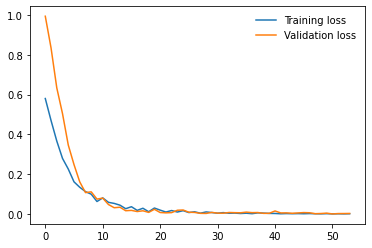

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [ ]:
import torchvision

In [ ]:
def visualize_model(model, num_images=10):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(8, 20))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                # ax = plt.subplot(num_images,1, images_so_far)
                # ax.axis('off')
                # ax.set_title('predicted: {}'.format(class_name[preds[j]]))
                # plt.subplot(num_images, 2 , images_so_far)

                ax = fig.add_subplot(num_images, 2 , images_so_far)


                imshow(inputs.cpu().data[j], class_name(preds[j]))

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

torch.Size([3, 400, 400])


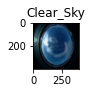

torch.Size([3, 400, 400])


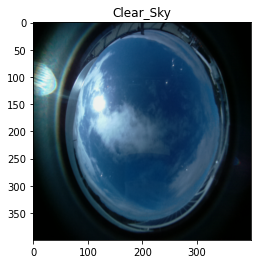

torch.Size([3, 400, 400])


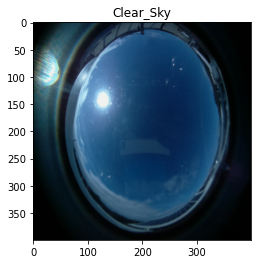

torch.Size([3, 400, 400])


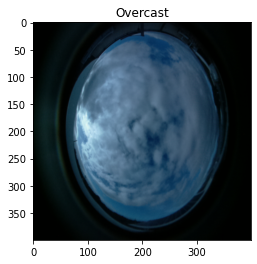

torch.Size([3, 400, 400])


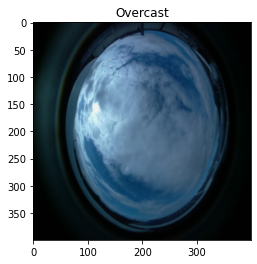

torch.Size([3, 400, 400])


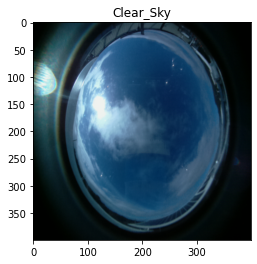

torch.Size([3, 400, 400])


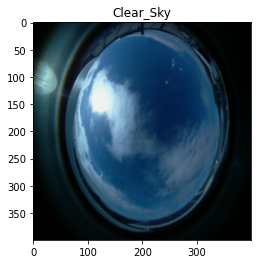

torch.Size([3, 400, 400])


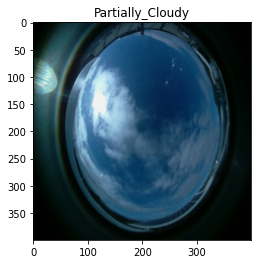

torch.Size([3, 400, 400])


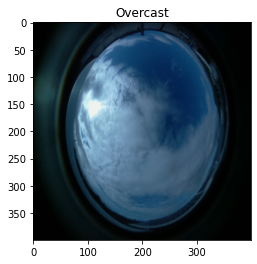

torch.Size([3, 400, 400])


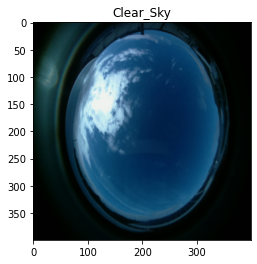

torch.Size([3, 400, 400])


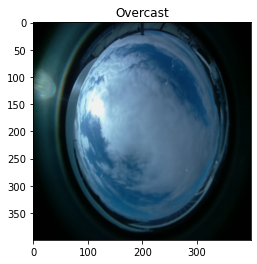

torch.Size([3, 400, 400])


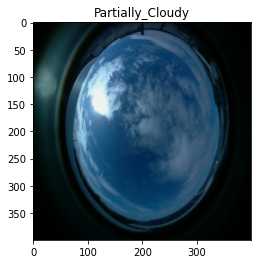

torch.Size([3, 400, 400])


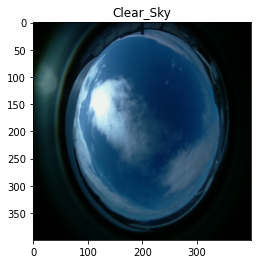

torch.Size([3, 400, 400])


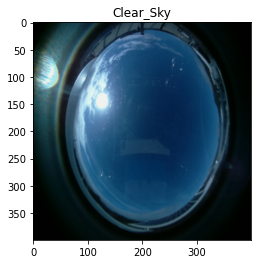

torch.Size([3, 400, 400])


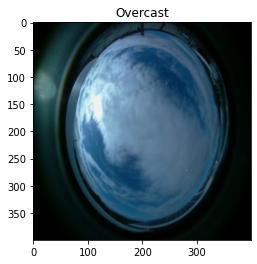

torch.Size([3, 400, 400])


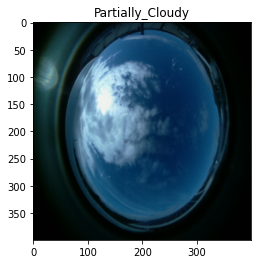

torch.Size([3, 400, 400])


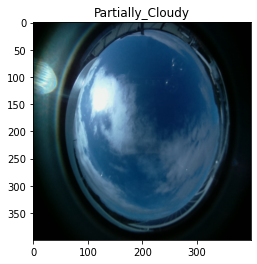

torch.Size([3, 400, 400])


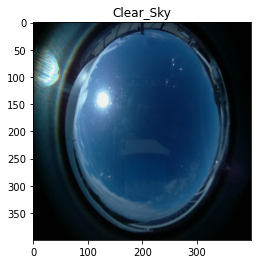

torch.Size([3, 400, 400])


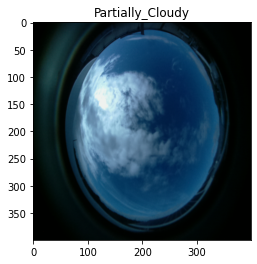

torch.Size([3, 400, 400])


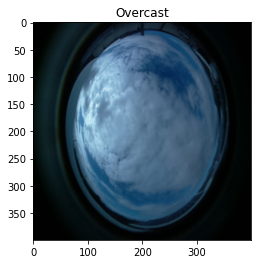

In [ ]:
visualize_model(model, num_images=20)

In [ ]:
batch_size = 10
def test(model,dataloader):
    running_corrects = 0
    running_loss=0
    pred = []
    true = []
    pred_wrong = []
    true_wrong = []
    image = []
    model.eval()

    with torch.no_grad():
      for batch_idx, (data, target) in enumerate(dataloader):
        # if batch_idx!=34:

        data = data.to(device)
        target = target.to(device)
        # model.eval()
        ##output = model(data)
        logps = model.forward(data)
        loss = criterion(logps, target)
        ##loss = criterion(output, labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        # equals = top_class == labels.view(*top_class.shape)
        # running_corrects+= torch.mean(equals.type(torch.FloatTensor)).item()
        # loss = criterion(output, target)
        # output = sm(output)
        ## _, preds = torch.max(output, 1)
        running_corrects = running_corrects + torch.sum(top_class == target.data)
        running_loss += loss.item() * data.size(0)
        preds = top_class.cpu().numpy()
        target = target.cpu().numpy()
        preds = np.reshape(preds,(len(preds),1))
        target = np.reshape(target,(len(target),1))
        data = data.cpu().numpy()

        # batch_loss = criterion(logps, labels)
        # test_loss += batch_loss.item()

        # ps = torch.exp(logps)
        # top_p, top_class = ps.topk(1, dim=1)
        # equals = top_class == labels.view(*top_class.shape)
        # testaccuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        # print(preds, target,'...................')


        for i in range(len(preds)):
            pred.append(preds[i])
            true.append(target[i])
            if(preds[i]!=target[i]):
                pred_wrong.append(preds[i])
                true_wrong.append(target[i])
                image.append(data[i])

    epoch_acc = running_corrects.double()/(len(dataloader)*batch_size)
    epoch_loss = running_loss/(len(dataloader)*batch_size)
    print(epoch_acc,epoch_loss)
    return true,pred,image,true_wrong,pred_wrong

In [ ]:
true,pred,image,true_wrong,pred_wrong =  test(model,val_loader)

tensor(3.7500, device='cuda:0', dtype=torch.float64) 0.003633104009095405


In [ ]:
print(pred)

[array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([2]), array([1]), array([0]), array([1]), array([2]), array([0]), array([0]), array([1]), array([2]), array([2]), array([0]), array([2]), array([1]), array([1]), array([2]), array([0]), array([1]), array([2]), array([1]), array([1]), array([0]), array([0]), array([2]), array([0]), array([2]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([2]), array([2]), array([0]), array([1]), array([2]), array([0]), array([0]), array([2]), array([2]), array([2]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([2]), array([0]), array([1]), array([2]), array([0]), array([1]), array([0]), array([0]), array([2]), array([0]), array([1]), array([2]), array([0]), array([0]), array([2]), array([2]), array([2]), array([2]), array([0]), array([1]), array([1]), array([0]), array([2]), array([0]), array([0]), array([2]), arr

In [ ]:
def performance_matrix(true,pred):
    precision = metrics.precision_score(true,pred,average='macro')
    recall = metrics.recall_score(true,pred,average='macro')
    accuracy = metrics.accuracy_score(true,pred)
    f1_score = metrics.f1_score(true,pred,average='macro')
    print('Confusion Matrix:\n',metrics.confusion_matrix(true, pred))
    print('Precision: {} Recall: {}, Accuracy: {}: ,f1_score: {}'.format(precision*100,recall*100,accuracy*100,f1_score*100))


In [ ]:
import sklearn.metrics as metrics
performance_matrix(true,pred)

Confusion Matrix:
 [[40  0  0]
 [ 0 23  0]
 [ 0  0 28]]
Precision: 100.0 Recall: 100.0, Accuracy: 100.0: ,f1_score: 100.0


In [ ]:
for i in range(0, 31):
    pred_i=[]
    true_i=[]
    indices = [j for j, x in enumerate(true) if x==[i]]
    # print(indices) for k in indices: pred_i.append(pred[k]) true_i.append(true[k]) print(pred_i) print(true_i) precision = metrics.precision_score(true_i,pred_i,average='macro') recall = metrics.recall_score(true_i,pred_i,average='macro') accuracy = metrics.accuracy_score(true_i,pred_i) f1_score = metrics.f1_score(true_i,pred_i,average='macro') print('CLASS: {}, COUNT: {} ---- Precision: {} Recall: {}, Accuracy: {}: ,f1_score: {}'.format(class_name[i], len(indices), precision*100,recall*100,accuracy*100,f1_score*100)) print('\n')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PV power measurements for Location 1 and 3/Location 1 SBRC/GEN_DATA - Sheet1 - GEN_DATA - Sheet1.csv')

In [ ]:
for i in data.select_dtypes('object').columns:
   le = LabelEncoder().fit(data[i])
   data[i] = le.transform(data[i])

In [ ]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(data[['Time']])
Y_data = Y_scaler.fit_transform(data[['Generation']])

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y)

In [ ]:
hist_window = 10
horizon = 1
TRAIN_SPLIT = int(len(X_data)*0.7)
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

In [ ]:
batch_size = 256
buffer_size = 150
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True),input_shape=x_train.shape[-2:]),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences= True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences= False)),
  #tf.keras.layers.Dense(8, activation='tanh'),
  tf.keras.layers.Dense(16, activation='tanh'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='tanh'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='tanh'),
  tf.keras.layers.Dense(4, activation='tanh'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1),
 ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 256)          133120    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 256)          394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 256)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 10, 128)          164352    
 nal)                                                            
                                                        

In [ ]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
#early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[checkpoint] #early_stopings]

In [ ]:
history = lstm_model.fit(train_data,epochs=100,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - 35s 115ms/step - loss: 0.0793 - val_loss: 0.0730
Epoch 2/100
100/100 [==============================] - 7s 69ms/step - loss: 0.0187 - val_loss: 0.0427
Epoch 3/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0109 - val_loss: 0.0450
Epoch 4/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0103 - val_loss: 0.0473
Epoch 5/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0096 - val_loss: 0.0466
Epoch 6/100
100/100 [==============================] - 7s 73ms/step - loss: 0.0086 - val_loss: 0.0406
Epoch 7/100
100/100 [==============================] - 7s 67ms/step - loss: 0.0082 - val_loss: 0.0480
Epoch 8/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0083 - val_loss: 0.0470
Epoch 9/100
100/100 [==============================] - 7s 69ms/step - loss: 0.0080 - val_loss: 0.0390
Epoch 10/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0

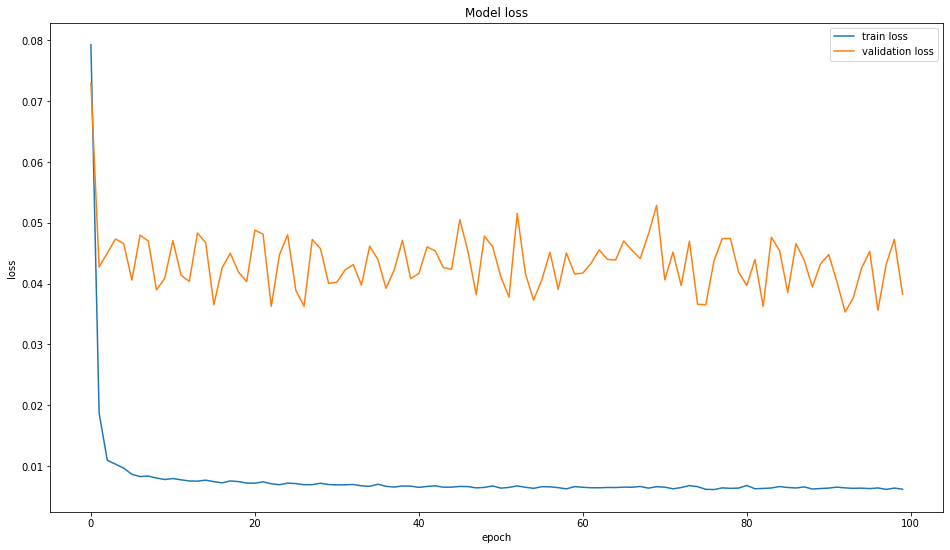

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()


In [ ]:
data_val = X_scaler.fit_transform(data[['Time']].tail(10))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred = lstm_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

array([[301.18317]], dtype=float32)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred):
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Generation'],pred_Inverse[0])

In [ ]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['traffic_volume']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Traffic volume")
plt.legend(('Actual','predicted'))
plt.show()